In [ ]:
%pip install pymoo

__Class Development__

In [3]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

In [16]:
class MyProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var = 3,
                         n_obj = 2,
                         n_ieq_constr = 2,
                         xl = np.array([-10, -10, -10]),
                         xu = np.array([10, 10, 10]))

    def _evaluate(self, x, out, *args, **kargs):
        f1 = ((x[0]**2) + (x[1]**2) + (x[2]**2))
        f2 = (x[0] - 1)**2 + (x[1] - 1)**2 + (x[2] - 1)**2

        g1 = x[0] + x[1] + x[2] - 1
        g2 = (-3 * x[0]) + x[1] + x[2] - 4

        out["F"] = [f1, f2]
        out["G"] = [g1, g2]

        return super()._evaluate(self, x, out, *args, **kargs)

problem = MyProblem()



__Initializing the Algorithm__

In [17]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM

In [18]:
algorithm = NSGA2(
    pop_size = 50,
    n_offsprings = 10,
    sampling = FloatRandomSampling(),
    crossover = SBX(prob_var = 0.9, eta = 20),
    mutation = PM(eta = 25),
    eliminate_duplicate = True
)

In [19]:
from pymoo.termination import get_termination
termination = get_termination("n_gen", 100)

__Optimization Process__

In [20]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed = 7,
               save_history = True,
               verbose = True)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       50 |      1 |  0.000000E+00 |  7.0400185790 |             - |             -
     2 |       60 |      1 |  0.000000E+00 |  3.6065063788 |  0.000000E+00 |             f
     3 |       70 |      1 |  0.000000E+00 |  2.0100091797 |  0.000000E+00 |             f
     4 |       80 |      1 |  0.000000E+00 |  1.1042622269 |  0.000000E+00 |             f
     5 |       90 |      1 |  0.000000E+00 |  0.4621926217 |  4.4094253350 |         ideal
     6 |      100 |      1 |  0.000000E+00 |  0.0353665820 |  0.000000E+00 |             f
     7 |      110 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     8 |      120 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     9 |      130 |      1 |  0.000000E+00 |  0.000000E+00 |  4.8745946330 |         ideal
    10 |      140 |      2 |  0.000000E+00 |  0.000000E+00 |  1.0000000000 |         ideal

__Results and Evaluation__

In [29]:
X = res.X
F = res.F

In [31]:
X

array([[ 0.26561851,  0.11418361,  0.47105552],
       [ 0.2274479 ,  0.28200078,  0.1390336 ],
       [ 0.21927383,  0.19736972,  0.51435007],
       [ 0.21538611,  0.27986833,  0.21276813],
       [ 0.2162478 ,  0.19736972,  0.21902803],
       [ 0.21927383,  0.12577328,  0.14016249],
       [ 0.22646463,  0.11613128,  0.09199965],
       [ 0.21183336,  0.18270527,  0.21902803],
       [ 0.22657241,  0.18495951,  0.20708662],
       [ 0.06669277, -0.01760418,  0.09847732],
       [ 0.05239198,  0.13407284,  0.12080505],
       [-0.03621029,  0.00432204,  0.01962156],
       [ 0.21864592,  0.1940875 ,  0.39325856],
       [ 0.04620182,  0.17964912,  0.11775514],
       [ 0.19307196,  0.1248971 ,  0.19780992],
       [-0.03477646, -0.00704612,  0.01037424],
       [ 0.15617747,  0.13407284,  0.12999964],
       [ 0.04611606,  0.17595685,  0.11088019],
       [ 0.05646417,  0.13400721,  0.12278885],
       [ 0.15723988,  0.13407284,  0.11086904],
       [ 0.21927383,  0.19581785,  0.213

In [32]:
F

array([[3.05484395e-01, 1.60376911e+00],
       [1.50587326e-01, 1.85362278e+00],
       [3.51591814e-01, 1.48960458e+00],
       [1.69987733e-01, 1.75394260e+00],
       [1.33691196e-01, 1.86840009e+00],
       [8.35454541e-02, 2.11312625e+00],
       [7.32366375e-02, 2.20404553e+00],
       [1.26227866e-01, 1.89909455e+00],
       [1.28429947e-01, 1.89119286e+00],
       [1.44556153e-02, 2.71932381e+00],
       [3.53143061e-02, 2.42077457e+00],
       [1.71487038e-03, 3.02624826e+00],
       [2.40128289e-01, 1.62814434e+00],
       [4.82746876e-02, 2.36106253e+00],
       [9.20048303e-02, 2.06044688e+00],
       [1.36667464e-03, 3.06426335e+00],
       [5.92668353e-02, 2.21876693e+00],
       [4.53819184e-02, 2.37947573e+00],
       [3.62232388e-02, 2.40970276e+00],
       [5.49918490e-02, 2.25062834e+00],
       [1.31873147e-01, 1.87532138e+00],
       [1.06717755e-01, 1.99263723e+00],
       [3.26410607e-02, 2.45080026e+00],
       [1.51967890e-01, 1.84996454e+00],
       [1.647760

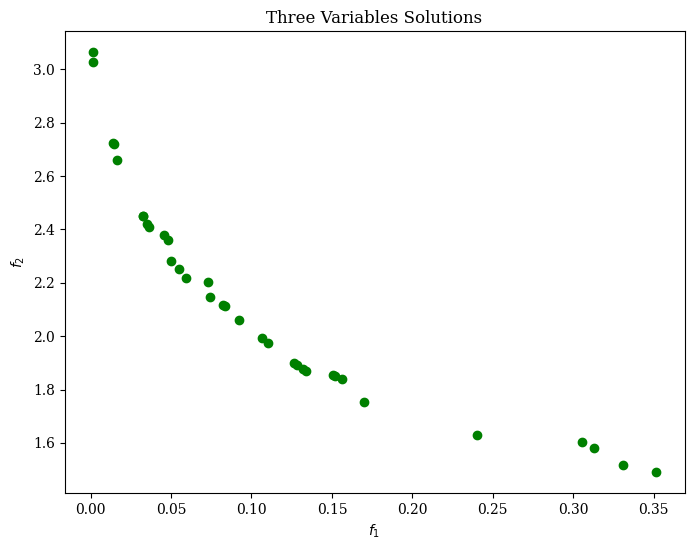

In [33]:
from pymoo.visualization.scatter import Scatter

plot = Scatter(title = "Three Variables Solutions")
plot.add(F, color = "green")
plot.show()